In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

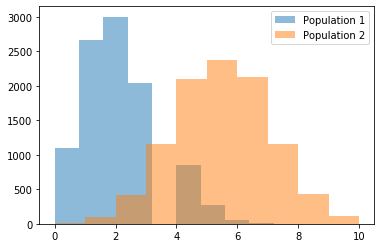

In [2]:
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10,0.5, 10000) 

# Let’s make histograms for the two groups. 

plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()

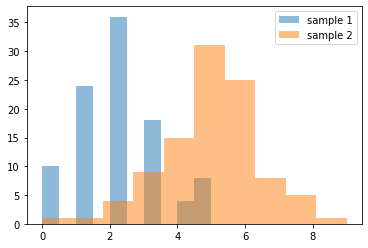

In [3]:
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

In [4]:
print(sample1.mean())
print(sample2.mean())
print(sample1.std())
print(sample2.std())

# Compute the difference between the two sample means.
diff=sample2.mean( ) -sample1.mean()
print(diff)

2.06
5.06
1.3024592124131948
1.567290655877205
2.9999999999999996


In [5]:
size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5  

#The difference between the means divided by the standard error: T-value.  
print(diff/diff_se)

14.721455373514885


In [6]:
from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=14.647663152573053, pvalue=4.350084487008382e-33)


**Assignments

Now that you have some code to create your own populations, sample them, and compare the samples to the populations, it's time to experiment. Using your own Jupyter notebook, or a copy of the notebook above, reproduce the pop1 and pop2 populations and samples using numpy's binomial function. Specifically, create two binomially distributed populations with n equal to 10 and size equal to 10000. The p-value of pop1 should be 0.2 and the p-value of pop2 should be 0.5. Using a sample size of 100, calculate the means and standard deviations of your samples.

For each of the following tasks, first write what you expect will happen, then code the changes and observe what does happen. Discuss the results with your mentor.

1. Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?

2. Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?

3. Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?

1. Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?

Initial expectations:
For samples of 1000, I expect the means to remain the same, and the standard deviations to change (reduce).
For samples of 20, I expect the means to change, and the standard deviations to change (increase).

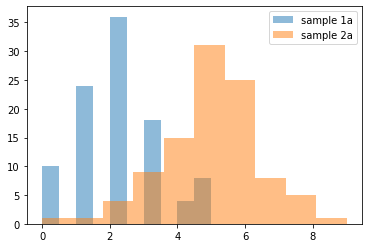

In [10]:
# Increasing the size of your samples from 100 to 1000
sample1a = np.random.choice(pop1, 1000, replace=True)
sample2a = np.random.choice(pop2, 1000, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1a') 
plt.hist(sample2, alpha=0.5, label='sample 2a') 
plt.legend(loc='upper right') 
plt.show()

In [13]:
print(sample1a.mean())
print(sample2a.mean())
print(sample1a.std())
print(sample2a.std())

# Compute the difference between the two sample means.
diff_a=sample2a.mean( ) -sample1a.mean()
print(diff_a)

1.981
4.952
1.2250057142723867
1.5974028921972063
2.971


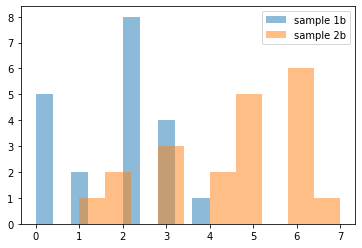

In [14]:
# decreasing the size of your samples from 100 to 20
sample1b = np.random.choice(pop1, 20, replace=True)
sample2b = np.random.choice(pop2, 20, replace=True)

plt.hist(sample1b, alpha=0.5, label='sample 1b') 
plt.hist(sample2b, alpha=0.5, label='sample 2b') 
plt.legend(loc='upper right') 
plt.show()

In [18]:
print(sample1b.mean())
print(sample2b.mean())
print(sample1b.std())
print(sample2b.std())

# Compute the difference between the two sample means.
diff_b=sample2b.mean( ) -sample1b.mean()
print(diff_b)

1.7
4.5
1.1874342087037917
1.6278820596099706
2.8


In [19]:
# comparing samples of 100 to 1000
print(sample1a.mean()  -sample1.mean())
print(sample2a.mean()  -sample1.mean())
print(sample1a.std()  -sample1.std())
print(sample2a.std()  -sample1.std())

# Compute the difference between the two sample means.
print(diff_a - diff)

-0.07899999999999996
2.892
-0.07745349814080815
0.2949436797840115
-0.02899999999999947


In [20]:
# comparing samples of 100 to 20
print(sample1b.mean()  -sample1.mean())
print(sample2b.mean()  -sample1.mean())
print(sample1b.std()  -sample1.std())
print(sample2b.std()  -sample1.std())

# Compute the difference between the two sample means.
print(diff_b - diff)

-0.3600000000000001
2.44
-0.11502500370940316
0.3254228471967757
-0.19999999999999973


In [21]:
# comparing samples of 1000 to 20
print(sample1b.mean()  -sample1a.mean())
print(sample2b.mean()  -sample1a.mean())
print(sample1b.std()  -sample1a.std())
print(sample2b.std()  -sample1a.std())

# Compute the difference between the two sample means.
print(diff_b - diff_a)

-0.28100000000000014
2.519
-0.03757150556859501
0.4028763453375839
-0.17100000000000026


2. Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?


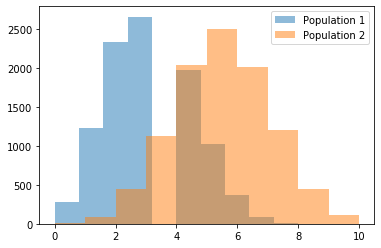

In [24]:
pop1_update1 = np.random.binomial(10, 0.3, 10000)
pop2 = np.random.binomial(10,0.5, 10000) 

# Let’s make histograms for the two groups. 

plt.hist(pop1_update1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()

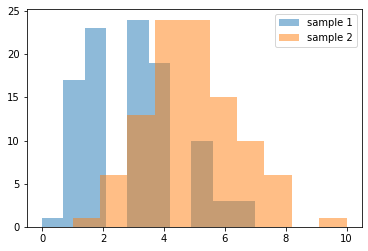

In [25]:
sample1_update1 = np.random.choice(pop1_update1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

plt.hist(sample1_update1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

In [26]:
print(ttest_ind(sample2, sample1_update1, equal_var=False))

Ttest_indResult(statistic=8.178593011142137, pvalue=3.505966231527365e-14)


In [27]:
pop1_update2 = np.random.binomial(10, 0.4, 10000)
pop2 = np.random.binomial(10,0.5, 10000) 

sample1_update2 = np.random.choice(pop1_update2, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

print(ttest_ind(sample2, sample1_update2, equal_var=False))

Ttest_indResult(statistic=4.545359685444195, pvalue=9.532984159404722e-06)


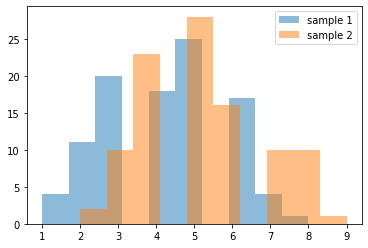

In [28]:
plt.hist(sample1_update2, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

The increase in the probability value from 0.3 to 0.4 resulted in a decrease in the t-statistic from 8.176 to 4.545, thus suggesting that the two means has reduced an they are now only about 4.5 standard errors apart (as evidenced by the greater overlap in the updated samples.

The increase in the probability value from 0.3 to 0.4 resulted in an increase in the p-value from 3.50e-14 to 9.53e-06, thus suggesting that it is now less likely that the difference we see in the samples meaningfully reflects the populations.

When sampling from a population (of any distribution), as the sample size gets larger the sample means tend to follow a normal probability distribution, clustering around the true population mean. The more non-normal the population, the larger the samples need to be.